In [55]:
import vitaldb
import pandas as pd
import requests
import json
import io
import time  # Importer time-modulet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show all rows
#pd.set_option('display.max_rows', None)  

# Show all columns
#pd.set_option('display.max_columns', None)  

# Prevent truncation of column width
#pd.set_option('display.max_colwidth', None)

# Prevent scientific notation (optional)
#pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
#Tracklist inneholder informationene: case identifier, track name(navnet på målingen og apparat), 

# track identifier (den konkrete patients konktere måling)
track_list_url = "https://api.vitaldb.net/trks"
df_tracklist = pd.read_csv(track_list_url) #Skriv tracklist_url inne i parantesen
df_tracklist.to_csv("trks.csv", index=False)

# Hent laboratoriedata fra API
laboratory_list_url = "https://api.vitaldb.net/labs"
df_laboratory = pd.read_csv(laboratory_list_url)

#Download clinical information
clinical_information_url = "https://api.vitaldb.net/cases"
df_clinical= pd.read_csv(clinical_information_url)



In [ ]:
time=df_clinical[['caseid','casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend']]
min_time=time[['casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend']].div(60)

#caselength= time['caseend'].div(3600) -time['casestart'].div(3600)
#oplength= time['opend'].div(3600) -time['opstart'].div(3600)
#print('Caselenght', caselength[0:10])
#print('Operationlength', oplength[0:10])

hypotention = df_clinical[['preop_htn']]

sum_hypotension = hypotention.isna().sum()
print('Sum hypotension', sum_hypotension)

preop=df_clinical[['optype','caseid']]

print(min_time[0:9])

print("There is this many nan values", preop.isna().sum())

print(preop[0:10])

#When both heart rate and percutaneous oxygen saturation signals are detected, patient monitoring is considered
#to have started and case recording begins immediately.

Sum hypotension 0
   casestart     caseend   anestart      aneend    opstart       opend
0        0.0  192.366667  -9.200000  180.800000  27.800000  172.800000
1        0.0  262.350000 -17.316667  248.683333  28.683333  243.683333
2        0.0   73.233333  -9.833333   70.166667  18.166667   50.166667
3        0.0  349.833333 -12.966667  337.033333  42.033333  297.033333
4        0.0  358.850000 -16.816667  373.183333  43.183333  338.183333
5        0.0   85.750000  -0.850000   79.150000  44.150000   74.150000
6        0.0  262.833333   7.950000  246.950000  52.950000  242.950000
7        0.0   98.633333 -12.466667   95.533333  12.533333   82.533333
8        0.0   74.683333  -8.016667   74.983333  14.983333   54.983333
There is this many nan values optype    0
caseid    0
dtype: int64
             optype  caseid
0        Colorectal       1
1           Stomach       2
2  Biliary/Pancreas       3
3           Stomach       4
4          Vascular       5
5  Biliary/Pancreas       6
6   Major

In [53]:
url = 'https://raw.githubusercontent.com/jennyskrytenjohnsen/P10/refs/heads/main/For_machinelearning/number_of_days_in_ICU.csv'
pat_in_ICU = pd.read_csv(url)

pat_in_ICU = pat_in_ICU[['caseid', 'icu_days_binary']]


ICU_patients = []
non_ICU_patients = []


def divide_into_ICU_and_non_ICU_patients():
    for index, row in pat_in_ICU.iterrows():
        if row['icu_days_binary'] == 1:
            ICU_patients.append(row['caseid'])
        else:
            non_ICU_patients.append(row['caseid'])

divide_into_ICU_and_non_ICU_patients()


#print(ICU_patients, len(ICU_patients))
#print(non_ICU_patients, len(non_ICU_patients))

Is nan caseid               0
preop_aptt         402
icu_days_binary      0
dtype: int64
level_division length: 5986 binary length: 5986 extreme_level_division: 5986
-------------------------------------------------------------------------------------------
   caseid  preop_aptt  icu_days_binary binary level_division  \
0       1        33.2                0      0              0   
1       2        31.9                0      0              0   
2       3        30.3                0      0              0   
3       4        34.5                1      0              0   
4       5        36.5                1      1              1   

  extreme_level_division  
0                      0  
1                      0  
2                      0  
3                      0  
4                      1  


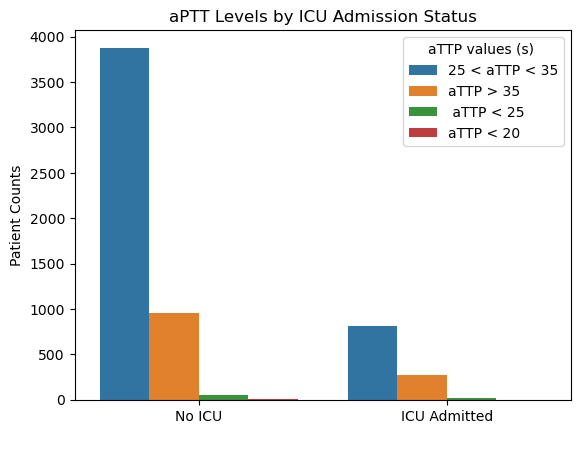

0       33.2
1       31.9
2       30.3
5       29.1
7       31.3
        ... 
6383    31.0
6384    28.7
6385    29.2
6386    32.2
6387    34.6
Name: preop_aptt, Length: 4886, dtype: float64


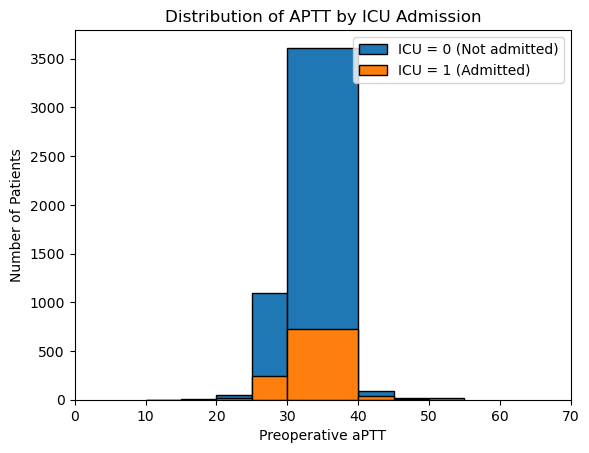

In [ ]:
url = 'https://raw.githubusercontent.com/jennyskrytenjohnsen/P10/refs/heads/main/For_machinelearning/number_of_days_in_ICU.csv'
pat_in_ICU = pd.read_csv(url)

df_caseidAndVariable =df_clinical[['caseid','preop_aptt']]
df_caseidAndVariableICUInformation = pd.concat([df_caseidAndVariable, pat_in_ICU['icu_days_binary']], axis=1)

print('Is nan', df_caseidAndVariableICUInformation.isna().sum())
df_caseidAndVariableICUInformation=df_caseidAndVariableICUInformation.dropna()


binary=[]
level_division = []
extreme_level_division = []

#for index, row in aptt.iterrows():


for index, row in df_caseidAndVariableICUInformation.iterrows():
    if row['preop_aptt'] < 20:
        extreme_level_division.append('-2')
        level_division.append('-1')
        binary.append('1')
    elif row['preop_aptt'] < 25:
        level_division.append('-1')
        binary.append('1')
        extreme_level_division.append('-1')
    elif 25 <= row['preop_aptt'] <= 35:
        binary.append('0') 
        level_division.append('0')
        extreme_level_division.append('0')
    elif row['preop_aptt'] > 35:
        level_division.append('1')
        binary.append('1')
        extreme_level_division.append('1')
    elif row['preop_aptt'] > 50:
        extreme_level_division.append('2')
        level_division.append('1')
        binary.append('1')



print('level_division length:', len(level_division), 'binary length:', len(binary), 'extreme_level_division:', len(extreme_level_division) )


df_caseidAndVariableICUInformation['binary'] = binary
df_caseidAndVariableICUInformation['level_division'] = level_division
df_caseidAndVariableICUInformation['extreme_level_division'] = extreme_level_division


print('-------------------------------------------------------------------------------------------')

print(df_caseidAndVariableICUInformation.head())
###################################################################################################


sns.countplot(x ='icu_days_binary', hue = "extreme_level_division", data = df_caseidAndVariableICUInformation)
plt.title('aPTT Levels by ICU Admission Status')
plt.ylabel("Patient Counts")
plt.xlabel(" ")
plt.xticks([0, 1], ['No ICU', 'ICU Admitted'])
plt.legend(title='aTTP values (s) ', loc='upper right', labels=['25 < aTTP < 35', 'aTTP > 35', ' aTTP < 25 ', 'aTTP < 20', 'aTTP < 50'])
plt.show()

df_atppAndICUBinary= df_caseidAndVariableICUInformation[['preop_aptt', 'icu_days_binary']]

# Split the data
aptt_icu0 = df_atppAndICUBinary[df_atppAndICUBinary['icu_days_binary'] == 0]['preop_aptt']
aptt_icu1 = df_atppAndICUBinary[df_atppAndICUBinary['icu_days_binary'] == 1]['preop_aptt']

print(aptt_icu0)

# Plot both histograms
plt.hist(aptt_icu0, bins=[10, 15, 20, 25, 30, 40, 45, 50, 55],  label='ICU = 0 (Not admitted)', ec='black')
plt.hist(aptt_icu1, bins=[10, 15, 20, 25, 30, 40, 45, 50, 55], label='ICU = 1 (Admitted)', ec='black')

# Labels and legend
plt.xlabel("Preoperative aPTT")
plt.xlim(0,70)
plt.ylabel("Number of Patients")
plt.title("Distribution of APTT by ICU Admission")
plt.legend()
plt.show()


df_caseidAndVariableICUInformation = df_caseidAndVariableICUInformation.drop(columns=['icu_days_binary', 'binary', 'level_division', 'extreme_level_division'])


df_caseidAndVariableICUInformation.rename(columns={
    'caseid': 'CaseID',
    'preop_aptt': 'Variable_PreopAptt'}, inplace=True)

df_caseidAndVariableICUInformation.to_csv('Data_PreopAptt.csv', index=False)




ValueError: Shape of passed values is (1204, 1), indices imply (5184, 1)

In [ ]:
# DENNE FUNGERER NÅ!!!!!!!!!!!!!!!!  Til maria

#Denne koden henter EEG- og fysiologiske signaler fra en API, analyserer dem for datakvalitet, 
#og lagrer relevant informasjon i en CSV-fil hvis signalene oppfyller gitte kriterier.



# Liste for spesielle variabler
special_variables = {
    "SNUADC/ART", "SNUADC/CVP", "SNUADC/ECG_II", "SNUADC/ECG_V5",
    "SNUADC/FEM", "SNUADC/PLETH", "Primus/AWP", "Primus/CO2",
    "BIS/EEG1_WAV", "BIS/EEG2_WAV", "CardioQ/ABP", "CardioQ/FLOW"
}

# Liste for å lagre data som skal skrives til CSV
saved_tracks = []


# trackdata_url = f"https://api.vitaldb.net/0aa685df768489a18a5e9f53af0d83bf60890c73"
# response = requests.get(trackdata_url, timeout = 10)
# trackdata = pd.read_csv(io.StringIO(response.text)) 
# trackdata.to_csv("data/test.csv", index=False)


def collect_track_null_checker():
    # Hent hver trackidentifierverdi
    for index, row in df_tracklist.iterrows():
        if row['tname'] in special_variables:
            trackidentifier = row["tid"]
            trackdata_url = f"https://api.vitaldb.net/{trackidentifier}"
            
            # Handles API error

            try:
            
                response = requests.get(trackdata_url, timeout = 10)
                response.raise_for_status()
            except requests.exceptions.Timeout:
                print(f"Timeout-error: Can not get {row['tname']} ({trackdata_url})")
                continue # Go to next signal

            try:
                # Konverter API-respons til en pandas DataFrame
                trackdata = pd.read_csv(io.StringIO(response.text)) 
                if trackdata.empty:
                    continue
            except:
                continue


            data_column = trackdata.columns[1]  # Velger den andre kolonnen (indeks 1)

            # Tell antall nullverdier, nanveridr, totalt antall missing verdier, og find samplingsperiode
            zero_count = (trackdata[data_column] == 0).sum().sum()
            nan_count_per_column = trackdata[data_column].isna().sum().sum()
            total_non_value = zero_count+nan_count_per_column
            size = trackdata[data_column].size
            samplingperiode = trackdata.iloc[0,1]

            # Sjekk om mer enn 20% av verdiene er null
            
            if total_non_value >= 0.2 * size:
                print(f"index: {index} ,NO.This track, {trackdata.columns[1]}, has {zero_count} 0s, {nan_count_per_column} NAN, combined {total_non_value} non informatory values out of {size} samples")
            else:
                print(f"index: {index} ,Saved.This track, {trackdata.columns[1]}, has {zero_count} 0s, {nan_count_per_column} NAN, combined {total_non_value} non informatory values out of {size} samples")
                # Lagre caseid, tname og tid
                saved_tracks.append([row["caseid"], row["tname"], row["tid"], nan_count_per_column, zero_count, size, samplingperiode])
                trackdata.to_csv(f"data/{trackidentifier}.csv",index=False)
            # Vent 2 sekunder før neste forespørsel
            # time.sleep(2)
        else:
            print(f"index: {index} ,Did not have special_variables")

    # Konverter listen til en DataFrame og lagre som CSV
    if saved_tracks:
        df_saved_tracks = pd.DataFrame(saved_tracks, columns=["caseid", "tname", "tid", "nan_count_per_column","zero_count", "size", "samplingperiode"])
        df_saved_tracks.to_csv("saved_tracks.csv", index=False)
        print("CSV file 'saved_tracks.csv' has been saved.")
    else:
        print("No tracks met the criteria for saving.")

# Kjør funksjonen
collect_track_null_checker()



In [ ]:
special_variables = {'Solar8000/PLETH_HR'}

save_numerical_tracks = []

def count_missing_vaules_in_numeric_tracks():
    for index, row in df_tracklist.iterrows():
        if row['tname'] in special_variables:
            trackid= row['tid']
            caseid = row['caseid']
            print('Caseid', caseid, 'TrackName:', row['tname'])
            trackdata_url = f"https://api.vitaldb.net/{trackid}"

            response = requests.get(trackdata_url)
            trackdata = pd.read_csv(io.StringIO(response.text))
        
            time_before_start = trackdata.iloc[0,0]

            min_gap = trackdata.iloc[:20]['Time'].diff().min()
            min_gap = round(min_gap, 0)
            print('Min Gap:', min_gap)

            sampled_times = trackdata['Time'].diff()

            total_length_of_singal = len(trackdata['Time'])

            res = sum(x > min_gap for x in sampled_times[1:])
            print(res)

            if res > 0.2*total_length_of_singal:
                print('No, this signal has length', total_length_of_singal, 'and there are missing', res, 'values')
            
            else:
                print('Yes, this signal has length', total_length_of_singal, 'and are missing', res, 'values')
                save_numerical_tracks.append([row['caseid'], row['tname'], row['tid'], res, total_length_of_singal, min_gap])

    # Konverter listen til en DataFrame og lagre som CSV
    if save_numerical_tracks:
        df_saved_tracks = pd.DataFrame(save_numerical_tracks, columns=["caseid", "tname", "tid", "res","total_length_of_singal", "min_gap"])
        df_saved_tracks.to_csv("saved_tracks_numerical.csv", index=False)
        print("CSV file 'saved_tracks.csv' has been saved.")
    else:
        print("No tracks met the criteria for saving.")

    
count_missing_vaules_in_numeric_tracks()


In [ ]:
pd.set_option('display.max_rows', None)
def count_tracks ():
    counts = df_tracklist['tname'].value_counts()
    display(counts)
        
count_tracks()

In [ ]:

def count_lab_results ():
    counts=df_laboratory.groupby('name')['caseid'].nunique()
    display(counts)
        
#count_lab_results()


def collect_laboratory_values_two_inputs(caseid, var_name):
    """
    Henter laboratorieværdier for en given patient (caseid) og en specifik laboratorievariabel (var_name).
    """
    if not isinstance(caseid, int) or not isinstance(var_name, str):
        return "Ugyldig input, vennligst bruk en integer for caseid og en string for variabelnavn"
    
    # Filtrer på både caseid og variabelnavn
    filtered_df = df_laboratory[(df_laboratory['caseid'] == caseid) & (df_laboratory['name'] == var_name)]
    
    # Hvis ingen resultater findes
    if filtered_df.empty:
        return f"Ingen data fundet for caseid {caseid} og variabel '{var_name}'"
    
    return filtered_df[['caseid', 'dt', 'result']]  # Returns caseid, time and results

# Eksempel på kald
caseid_test = 4  # Erstat med en reel caseid
variable_test = "cr"  # Erstat med en reel laboratorievariabel

print(collect_laboratory_values_two_inputs(caseid_test, variable_test))

#Denne funksjonen krevet et input, enten caseid eller variabelnavn. 
# Henter enten all information ift caseif eller all information ift variabelnavn

def collect_laboratory_values(value):
    if isinstance(value, int):  # Hvis input er patient caseid
        filtered_df = df_laboratory[df_laboratory['caseid'] == value]
        data_array = filtered_df[['dt', 'name', 'result']].values
        return [['dt', 'name', 'result']] + data_array.tolist()  # Include column names

    elif isinstance(value, str):  # Hvis input er en variabelnavn
        filtered_df = df_laboratory[df_laboratory['name'] == value]
        data_array = filtered_df[['dt', 'caseid', 'result']].values
        return [['dt', 'caseid', 'result']] + data_array.tolist()  # Include column names

    else:
        return "Ugyldig input, vennligst bruk enten en integer eller en string"

# Test function
#collect_laboratory_values(1)  # Example caseid
collect_laboratory_values("sao2")  #Example variable name




In [ ]:
#HVIS MAN VIL PLOTTE ET Waveform data track. 
pd.set_option("display.max_rows", None)  # Vis alle rader
import numpy as np
import matplotlib.pyplot as plt

#LOADER SIGNALET  
trackdata_url = "http://api.vitaldb.net/8c9161aaae8cb578e2aa7b60f44234d98d2b3344"
response = requests.get(trackdata_url)
trackdata = pd.read_csv(io.StringIO(response.text))
print(trackdata.iloc[:1000]) 


#Henter ut signalfrekvensen, men bruker den ikke til noe her
signal_frequency = trackdata.iloc[1, 0]

#Starttid og endetidspunkt af signalet
start_time = trackdata.iloc[0,0]
end_time = trackdata.iloc[-1,0]
num_samples = len(trackdata)


# Generér tidsakse fra start til slut med korrekt sampling-rate
#time_axis = np.arange(start_time, end_time, signal_frequency)
time_axis = np.linspace(start_time, end_time, num_samples)

# Sikrer at tidsaksen har samme længde som trackdata
time_axis = time_axis[:len(trackdata)]

plt.plot(time_axis, trackdata.iloc[:, 1]) # Plotte Time vs. måling
plt.xlabel("Tid (sekunder)")
plt.xlim(0, 120)
plt.ylabel("Måling")
plt.title(f"Tidsserie fra VitalDB: {trackdata.columns[1]}")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#If you want to plot a data track

             #Example: (1, 'Solar8000/ART_SBP')
def caseid_and_variable(caseid, var_name):
    if not isinstance(caseid, int) or not isinstance(var_name, str):
        return "Unvalid input"
    
    trackid_df = df_tracklist[(df_tracklist['caseid'] == caseid) & (df_tracklist['tname'] == var_name)]

    row = trackid_df.iloc[0]  # Get the first row (if multiple exist)
    if trackid_df.empty: 
        return f" No aviable data found for caseid {caseid} and variable '{var_name}'"
    
    return row['caseid'], row['tname'], row['tid']

caseid, tname, trackid = caseid_and_variable(1,'Solar8000/ART_MBP')


#LOADER SIGNALET  
trackdata_url = f"http://api.vitaldb.net/{trackid}"
response = requests.get(trackdata_url)
trackdata = pd.read_csv(io.StringIO(response.text))
print(trackdata)

print('Samplenumbers:', len(trackdata['Time']))



plt.plot(trackdata["Time"], trackdata.iloc[:, 1], marker='o', linestyle='-') # Plotte Time vs. måling
#plt.xlabel("Tid (sekunder)")
plt.ylabel("Måling")
#plt.xlim(100,110)
plt.title(f"Timeserie from VitalDB & CaseID:{caseid} {tname} ")
plt.show()